In [1]:
#import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# set the graphs to show in the jupyter notebook
%matplotlib inline
import datetime as dt

**1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.**

In [2]:
#import csv files
customer=pd.read_csv("D:\Rohit IMP. File\python\case study\Python Foundation Case Study 1 - Retail Case Study\Customer.csv")
prod= pd.read_csv("D:\Rohit IMP. File\python\case study\Python Foundation Case Study 1 - Retail Case Study\prod_cat_info.csv")
Trans = pd.read_csv("D:\Rohit IMP. File\python\case study\Python Foundation Case Study 1 - Retail Case Study\Transactions.csv")

In [3]:
#merging csv files
cust_final =pd.merge(left =Trans ,right =customer,how = "inner" ,left_on ='cust_id', right_on ='customer_Id',indicator =True )

In [4]:
cust_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,both
1,80712190438,270351,20-02-2014,1,1,5,772,405.3,4265.3,e-Shop,270351,26-09-1981,M,5.0,both


In [5]:
customer_final =pd.merge(left =cust_final ,right =prod ,how ='inner', left_on ='prod_cat_code' , right_on ='prod_cat_code')

In [6]:
customer_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,both,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,both,Clothing,1,Women


**2. Prepare a summary report for the merged data set.**

**(a). Get the column names and their corresponding data types**

In [7]:
customer_final.dtypes

transaction_id          int64
cust_id                 int64
tran_date              object
prod_subcat_code        int64
prod_cat_code           int64
Qty                     int64
Rate                    int64
Tax                   float64
total_amt             float64
Store_type             object
customer_Id             int64
DOB                    object
Gender                 object
city_code             float64
_merge               category
prod_cat               object
prod_sub_cat_code       int64
prod_subcat            object
dtype: object

In [8]:
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"])
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])

In [9]:
customer_final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
_merge                     category
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

**(b). Top/Bottom 10 observations**

In [10]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,4,Mens
1,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,1,Women
2,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,3,Kids
3,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,4,Mens
4,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,1,Women
5,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,3,Kids
6,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-08-06,M,3.0,both,Clothing,4,Mens
7,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-08-06,M,3.0,both,Clothing,1,Women
8,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-08-06,M,3.0,both,Clothing,3,Kids
9,63126920365,271489,2011-05-22,4,1,4,131,55.020,579.020,TeleShop,271489,1971-04-21,M,9.0,both,Clothing,4,Mens


In [11]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge,prod_cat,prod_sub_cat_code,prod_subcat
99283,34958490122,266849,2011-02-20,12,6,4,1155,485.10,5105.10,e-Shop,266849,1979-12-10,M,1.0,both,Home and kitchen,11,Bath
99284,34958490122,266849,2011-02-20,12,6,4,1155,485.10,5105.10,e-Shop,266849,1979-12-10,M,1.0,both,Home and kitchen,12,Tools
99285,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,both,Home and kitchen,2,Furnishing
99286,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,both,Home and kitchen,10,Kitchen
99287,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,both,Home and kitchen,11,Bath
99288,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,both,Home and kitchen,12,Tools
99289,20417144530,269556,2011-01-29,10,6,3,654,206.01,2168.01,Flagship store,269556,1972-12-27,M,5.0,both,Home and kitchen,2,Furnishing
99290,20417144530,269556,2011-01-29,10,6,3,654,206.01,2168.01,Flagship store,269556,1972-12-27,M,5.0,both,Home and kitchen,10,Kitchen
99291,20417144530,269556,2011-01-29,10,6,3,654,206.01,2168.01,Flagship store,269556,1972-12-27,M,5.0,both,Home and kitchen,11,Bath
99292,20417144530,269556,2011-01-29,10,6,3,654,206.01,2168.01,Flagship store,269556,1972-12-27,M,5.0,both,Home and kitchen,12,Tools


**(c). “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)**

In [12]:
customer_final.loc[ : , ['total_amt','Rate','Tax','Qty']].describe()

,total_amt,Rate,Tax,Qty
count,99293.000000,99293.000000,99293.000000,99293.000000
mean,2114.616420,637.919884,248.873736,2.438017
std,2502.306768,621.576326,187.014422,2.260726
min,-8270.925000,-1499.000000,7.350000,-5.000000
25%,762.450000,313.000000,98.280000,1.000000
50%,1761.370000,713.000000,199.920000,3.000000
75%,3585.725000,1109.000000,366.975000,4.000000
max,8287.500000,1500.000000,787.500000,5.000000


**(d) Frequency tables for all the categorical variables**

In [13]:
customer_final.describe(include=[object])

,Store_type,Gender,prod_cat,prod_subcat
count,99293,99253,99293,99293
unique,4,2,6,18
top,e-Shop,M,Books,Mens
freq,40185,51051,36414,7957


**3. Generate histograms for all continuous variables and frequency bars for categorical variables.**


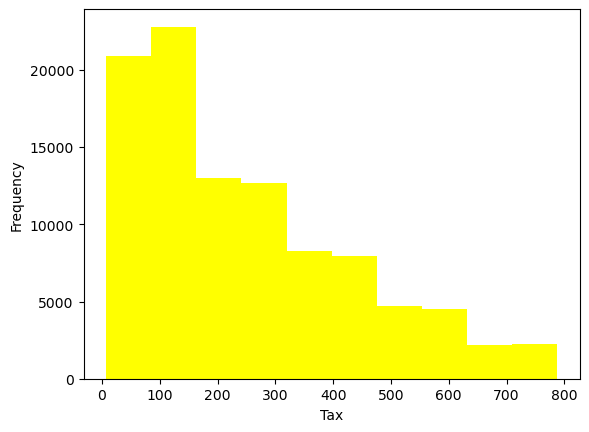

In [14]:
plt.hist(customer_final.Tax,color=['yellow'])
plt.xlabel('Tax')
plt.ylabel('Frequency')
plt.show()

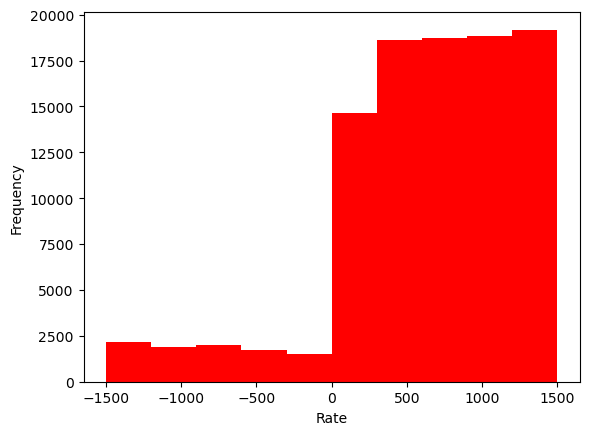

In [15]:
plt.hist(customer_final.Rate,color ='r')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

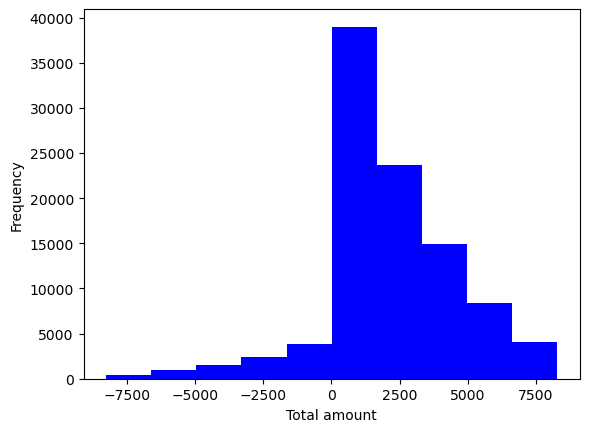

In [16]:
plt.hist(customer_final.total_amt,color ='blue')
plt.xlabel('Total amount')
plt.ylabel('Frequency')
plt.show()

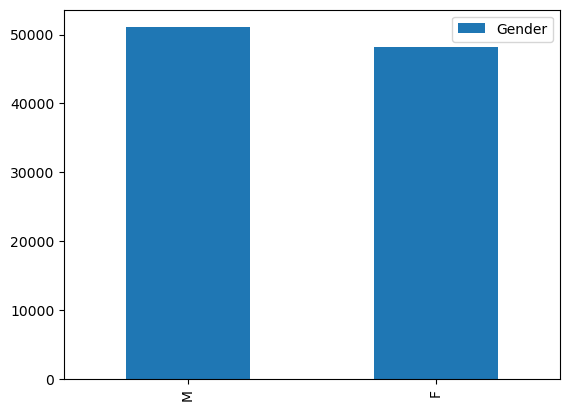

In [17]:
pd.DataFrame(customer_final['Gender'].value_counts()).plot(kind = 'bar')
plt.show()

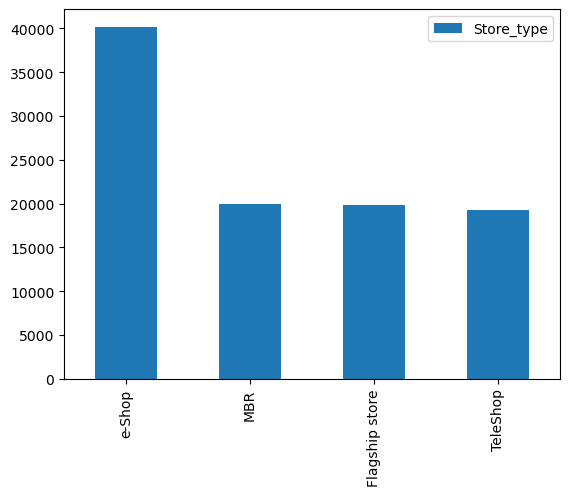

In [18]:
pd.DataFrame(customer_final['Store_type'].value_counts()).plot(kind ='bar')
plt.show()

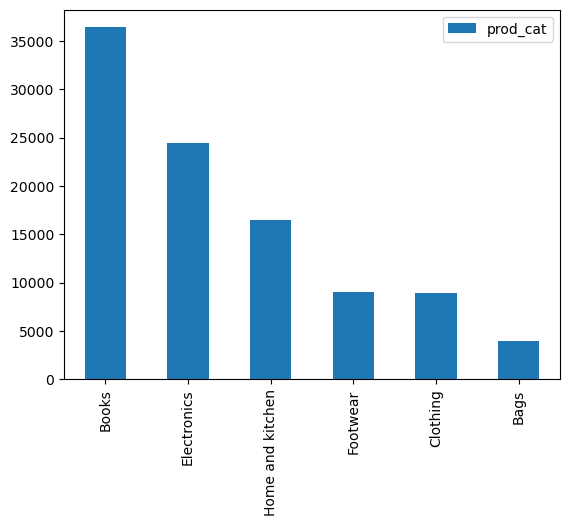

In [19]:
pd.DataFrame(customer_final['prod_cat'].value_counts()).plot(kind= 'bar')
plt.show()

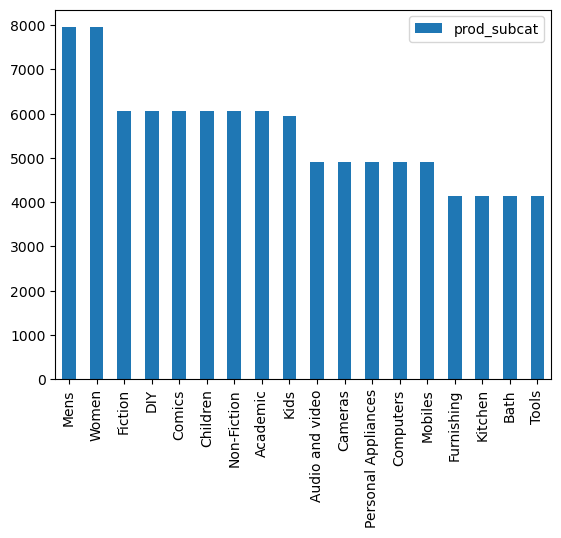

In [20]:
pd.DataFrame(customer_final['prod_subcat'].value_counts()).plot(kind ='bar')
plt.show()

**4. Calculate the following information using the merged dataset:**

**(a). Time period of the available transaction data**

In [21]:
customer_final.sort_values(by="tran_date")

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge,prod_cat,prod_sub_cat_code,prod_subcat
40643,80348907828,267124,2011-01-02,5,3,2,552,115.920,1219.920,TeleShop,267124,1974-08-21,M,2.0,both,Electronics,5,Computers
40363,21830961921,267482,2011-01-02,10,3,4,455,191.100,2011.100,MBR,267482,1978-07-29,M,7.0,both,Electronics,5,Computers
40362,21830961921,267482,2011-01-02,10,3,4,455,191.100,2011.100,MBR,267482,1978-07-29,M,7.0,both,Electronics,4,Mobiles
38561,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,272756,1975-03-12,F,9.0,both,Electronics,10,Audio and video
38560,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,272756,1975-03-12,F,9.0,both,Electronics,9,Cameras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18619,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,271180,1987-08-11,M,4.0,both,Electronics,8,Personal Appliances
18620,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,271180,1987-08-11,M,4.0,both,Electronics,9,Cameras
18621,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,271180,1987-08-11,M,4.0,both,Electronics,10,Audio and video
9152,23525861068,268100,2014-12-02,1,2,3,1318,415.170,4369.170,TeleShop,268100,1991-02-26,M,1.0,both,Footwear,4,Kids


In [22]:
min_date = customer_final["tran_date"].min()    #extract min date
max_date = customer_final["tran_date"].max()    #extract max date
print("Time period of the available transaction data is from "+ 
      dt.datetime.strftime(min_date,format="%d-%m-%Y") + " to " + dt.datetime.strftime(max_date,format="%d-%m-%Y"))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


**(b). Count of transactions where the total amount of transaction was negative**

In [23]:
tran_count = customer_final['total_amt']
tran_count_neagative =customer_final.loc[(tran_count<0),['total_amt']].count()
tran_count_neagative

total_amt    9294
dtype: int64

**5. Analyze which product categories are more popular among females vs male customers.**


In [24]:
# Popular among Male
M = customer_final.loc[customer_final['Gender']=='M']
group_prod = M.groupby(['prod_cat'])['Qty'].sum()
popular_M = group_prod.nlargest(1)
print('The most popular product category in Male customers is : ',popular_M)

# Popular among Female
F = customer_final.loc[customer_final['Gender']=='F']
group_prod1 = F.groupby(['prod_cat'])['Qty'].sum()
popular_F = group_prod1.nlargest(1)
print('The most popular product category in Female customers is : ',popular_F)

The most popular product category in Male customers is :  prod_cat
Books    45522
Name: Qty, dtype: int64
The most popular product category in Female customers is :  prod_cat
Books    42420
Name: Qty, dtype: int64


**6. Which City code has the maximum customers and what was the percentage of customers from 
that city?**

In [25]:
max_cust = customer['city_code'].value_counts()
t = max_cust.nlargest(1)

display("City code which has Maximum customers is : ",t)

#percentage of customers from city code 3
tot_customer = customer['customer_Id'].count()
percent = round((595/tot_customer)*100,2)
print("Percentage of customers from the city code 3 is {}%  ".format(percent))

'City code which has Maximum customers is : '

3.0    595
Name: city_code, dtype: int64

Percentage of customers from the city code 3 is 10.54%  


**7. Which store type sells the maximum products by value and by quantity?**

In [26]:
sort_list = customer_final.sort_values(['total_amt','Qty'],ascending = False)
print(sort_list.head(1)['Store_type'])

9165    e-Shop
Name: Store_type, dtype: object


**8. What was the total amount earned from the "Electronics" and "Clothing" categories from 
Flagship Stores?**

In [27]:
df = customer_final[customer_final.prod_cat.isin(['Electronics','Clothing']) & (customer_final.Store_type == 'Flagship store')]
total = df.total_amt.sum()
print('Total amount earned',total)

Total amount earned 14658949.89


**9. What was the total amount earned from "Male" customers under the "Electronics" category?**

In [28]:
df = customer_final[(customer_final.Gender == 'M') & (customer_final.prod_cat == 'Electronics')]
amt = df.total_amt.sum()
print('Total amount earned ',amt)

Total amount earned  28515547.125


**10. How many customers have more than 10 unique transactions, after removing all transactions 
which have any negative amounts?**

In [29]:
tr = customer_final[customer_final.total_amt>0]
tr1 = tr.transaction_id.nunique()
print('customers have more than 10 unique transactions ',tr1)

customers have more than 10 unique transactions  20876


**11. For all customers aged between 25 - 35, find out:**

**a. What was the total amount spent for “Electronics” and “Books” product categories?**


In [30]:
#Adding new column 'age'
now = pd.Timestamp('now')
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format='%m%d%y')
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now, customer_final['DOB'] -  np.timedelta64(100, 'Y'))
customer_final['AGE'] = (now - customer_final['DOB']).astype('<m8[Y]')

In [31]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge,prod_cat,prod_sub_cat_code,prod_subcat,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,4,Mens,41.0
1,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,1,Women,41.0
2,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,3,Kids,41.0
3,80712190438,270351,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,4,Mens,41.0
4,80712190438,270351,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,1,Women,41.0


In [32]:
#creating new column 'Age_cat' 
customer_final['Age_cat'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge,prod_cat,prod_sub_cat_code,prod_subcat,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,4,Mens,41.0,36-46
1,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,1,Women,41.0,36-46
2,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,3,Kids,41.0,36-46
3,80712190438,270351,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,4,Mens,41.0,36-46
4,80712190438,270351,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,270351,1981-09-26,M,5.0,both,Clothing,1,Women,41.0,36-46


In [33]:
# grouping the dataframe 'customer_final' on the basis of 'Age_cat' and 'prod_cat'
customer_25_35 = customer_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()
customer_25_35

Age_cat  prod_cat        
25-35    Bags                1.905683e+06
         Books               1.768367e+07
         Clothing            4.913009e+06
         Electronics         1.291657e+07
         Footwear            4.730959e+06
         Home and kitchen    8.262805e+06
36-46    Bags                3.904321e+06
         Books               3.730183e+07
         Clothing            9.047567e+06
         Electronics         2.543640e+07
         Footwear            8.981760e+06
         Home and kitchen    1.633415e+07
47-57    Bags                2.439413e+06
         Books               2.195066e+07
         Clothing            4.792837e+06
         Electronics         1.525935e+07
         Footwear            4.946603e+06
         Home and kitchen    9.159018e+06
Name: total_amt, dtype: float64

In [34]:
customer_25_35.loc['25-35',['Books','Electronics']]

Age_cat  prod_cat   
25-35    Books          17683668.6
         Electronics    12916566.0
Name: total_amt, dtype: float64

In [35]:
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      customer_25_35.loc['25-35',['Books','Electronics']].sum().round(2))

Total amount spent on 'Electronics' and 'Books' product categories is 30600234.6


**(b) What was the total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014?**

In [36]:
# filtering out data that belongs to the 'age_cat' = 25-35
customer_total_amount_25_35 = customer_final[customer_final['Age_cat']=='25-35']
customer_total_amount_25_35.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge,prod_cat,prod_sub_cat_code,prod_subcat,AGE,Age_cat
42,31995208412,268509,2013-01-08,4,1,5,938,492.45,5182.45,TeleShop,268509,1989-08-17,M,10.0,both,Clothing,4,Mens,33.0,25-35
43,31995208412,268509,2013-01-08,4,1,5,938,492.45,5182.45,TeleShop,268509,1989-08-17,M,10.0,both,Clothing,1,Women,33.0,25-35
44,31995208412,268509,2013-01-08,4,1,5,938,492.45,5182.45,TeleShop,268509,1989-08-17,M,10.0,both,Clothing,3,Kids,33.0,25-35
45,43469248603,268444,2012-06-01,4,1,2,403,84.63,890.63,MBR,268444,1992-02-01,F,6.0,both,Clothing,4,Mens,31.0,25-35
46,43469248603,268444,2012-06-01,4,1,2,403,84.63,890.63,MBR,268444,1992-02-01,F,6.0,both,Clothing,1,Women,31.0,25-35


In [37]:
# getting all the data with transaction date between 1st Jan 2014 to 1st Mar 2014?
total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]
total_amount.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge,prod_cat,prod_sub_cat_code,prod_subcat,AGE,Age_cat
180,73713102191,268867,2014-02-15,1,1,1,714,74.970,788.970,MBR,268867,1987-10-24,F,4.0,both,Clothing,4,Mens,35.0,25-35
181,73713102191,268867,2014-02-15,1,1,1,714,74.970,788.970,MBR,268867,1987-10-24,F,4.0,both,Clothing,1,Women,35.0,25-35
182,73713102191,268867,2014-02-15,1,1,1,714,74.970,788.970,MBR,268867,1987-10-24,F,4.0,both,Clothing,3,Kids,35.0,25-35
198,57134739558,270625,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,270625,1992-03-02,M,6.0,both,Clothing,4,Mens,31.0,25-35
199,57134739558,270625,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,270625,1992-03-02,M,6.0,both,Clothing,1,Women,31.0,25-35


In [38]:
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',
      total_amount['total_amt'].sum())

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 1708854.875
